



## Project: Speech Recognition with Neural Networks for therapy


## Introduction  

In this notebook, we built a deep neural network that functions as part of an end-to-end automatic speech recognition (ASR) pipeline! thi pipeline will accept raw audio as input and return a predicted transcription of the spoken language.



- **STEP 1** is a pre-processing step that converts raw audio to one of two feature representations that are commonly used for ASR. 
- **STEP 2** is an acoustic model which accepts audio features as input and returns a probability distribution over all potential transcriptions.  After learning about the basic types of neural networks that are often used for acoustic modeling, you will engage in your own investigations, to design your own acoustic model!
- **STEP 3** in the pipeline takes the output from the acoustic model and returns a predicted transcription.  

Structure of this notebook

- [**STEP 1**](#step1): Acoustic Features for Speech Recognition
- [**STEP 2**](#step2): Deep Neural Networks for Acoustic Modeling
    - [Model 0](#model0): RNN
    - [Model 1](#model1): RNN + TimeDistributed Dense
    - [Model 2](#model2): CNN + RNN + TimeDistributed Dense
    - [Model 3](#model3): Deeper RNN + TimeDistributed Dense
    - [Model 4](#model4): Bidirectional RNN + TimeDistributed Dense
    - [Models 5+](#model5)
    - [Compare the Models](#compare)
    - [Final Model](#final)
- [**STEP 3**](#step3): Obtain Predictions

<a id='thedata'></a>
## The Data

We begin by investigating the dataset that will be used to train and evaluate your pipeline.  [LibriSpeech](http://www.danielpovey.com/files/2015_icassp_librispeech.pdf) is a large corpus of English-read speech, designed for training and evaluating models for ASR.  The dataset contains 1000 hours of speech derived from audiobooks.  We will work with a small subset in this project, since larger-scale data would take a long while to train. 
 The returned variables are:
- `vis_text` - transcribed text (label) for the training example.
- `vis_raw_audio` - raw audio waveform for the training example.
- `vis_mfcc_feature` - mel-frequency cepstral coefficients (MFCCs) for the training example.
- `vis_spectrogram_feature` - spectrogram for the training example. 
- `vis_audio_path` - the file path to the training example.

In [ ]:
from data_generator import vis_train_features

# extract label and audio features for a single training example
vis_text, vis_raw_audio, vis_mfcc_feature, vis_spectrogram_feature, vis_audio_path = vis_train_features()

The following code cell visualizes the audio waveform for your chosen example, along with the corresponding transcript.  You also have the option to play the audio in the notebook!

In [ ]:
from IPython.display import Markdown, display
from data_generator import vis_train_features, plot_raw_audio
from IPython.display import Audio
%matplotlib inline

# plot audio signal
plot_raw_audio(vis_raw_audio)
# print length of audio signal
display(Markdown('**Shape of Audio Signal** : ' + str(vis_raw_audio.shape)))
# print transcript corresponding to audio clip
display(Markdown('**Transcript** : ' + str(vis_text)))
# play the audio file
Audio(vis_audio_path)

In [ ]:
# Import the necessary modules from oneDNN
import onednn as dnn

# Create a oneDNN memory object for the input data
input_data = dnn.memory(shape=(batch_size, input_size), data_type=dnn.float32, format=dnn.memory.format.nc)

# Create a oneDNN memory object for the output data
output_data = dnn.memory(shape=(batch_size, output_size), data_type=dnn.float32, format=dnn.memory.format.nc)

# Create a oneDNN primitive for the computation
primitive = dnn.primitive(input_data, output_data)

# Execute the computation using oneDNN
primitive.execute()

# Get the results from the oneDNN memory object
results = output_data.get_data()

# Continue with the rest of your code using the optimized results


## To import the oneDNN library from Intel oneAPI oneDNN:



In [ ]:
%pip install onednn-cpu-gomp

import oneDNN as dnn



In [ ]:
import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'
os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'

<a id='step1'></a>
## STEP 1: Acoustic Features for Speech Recognition

For this project, we didn't use the raw audio waveform as input to your model.  Instead, we provide code that first performs a pre-processing step to convert the raw audio to a feature representation that has historically proven successful for ASR models.  Your acoustic model will accept the feature representation as input.


### Spectrograms

The first option for an audio feature representation is the [spectrogram](https://www.youtube.com/watch?v=_FatxGN3vAM).  In order to complete this project, you will **not** need to dig deeply into the details of how a spectrogram is calculated; but, if you are curious, the code for calculating the spectrogram was borrowed from [this repository](https://github.com/baidu-research/ba-dls-deepspeech).  The implementation appears in the `utils.py` file in your repository.

The code that we give you returns the spectrogram as a 2D tensor, where the first (_vertical_) dimension indexes time, and the second (_horizontal_) dimension indexes frequency.  To speed the convergence of your algorithm, we have also normalized the spectrogram.  (You can see this quickly in the visualization below by noting that the mean value hovers around zero, and most entries in the tensor assume values close to zero.)

In [ ]:
from data_generator import plot_spectrogram_feature

# plot normalized spectrogram
plot_spectrogram_feature(vis_spectrogram_feature)
# print shape of spectrogram
display(Markdown('**Shape of Spectrogram** : ' + str(vis_spectrogram_feature.shape)))

### Mel-Frequency Cepstral Coefficients (MFCCs)

Just as with the spectrogram features, the MFCCs are normalized in the supplied code.

source:[documentation](https://github.com/jameslyons/python_speech_features)

The main idea behind MFCC features is the same as spectrogram features: at each time window, the MFCC feature yields a feature vector that characterizes the sound within the window.  Note that the MFCC feature is much lower-dimensional than the spectrogram feature, which could help an acoustic model to avoid overfitting to the training dataset. 

In [ ]:
from data_generator import plot_mfcc_feature

# plot normalized MFCC
plot_mfcc_feature(vis_mfcc_feature)
# print shape of MFCC
display(Markdown('**Shape of MFCC** : ' + str(vis_mfcc_feature.shape)))

For constructing pipeline
sources:

- This [repository](https://github.com/baidu-research/ba-dls-deepspeech) uses spectrograms.
- This [repository](https://github.com/mozilla/DeepSpeech) uses MFCCs.
- This [repository](https://github.com/buriburisuri/speech-to-text-wavenet) also uses MFCCs.
- This [repository](https://github.com/pannous/tensorflow-speech-recognition/blob/master/speech_data.py) experiments with raw audio, spectrograms, and MFCCs as features.

<a id='step2'></a>
## STEP 2: Deep Neural Networks for Acoustic Modeling

In this section, we experimented with various neural network architectures for acoustic modeling.  



After experimenting with the five simple architectures,  Based on findings, constructing  a deeper architecture that is designed to outperform all of the shallow models.


In [6]:
#####################################################################
# RUN THIS CODE CELL IF YOU ARE RESUMING THE NOTEBOOK AFTER A BREAK #
#####################################################################

# allocate 50% of GPU memory (if you like, feel free to change this)
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf 
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
set_session(tf.Session(config=config))

# watch for any changes in the sample_models module, and reload it automatically
%load_ext autoreload
%autoreload 2
# import NN architectures for speech recognition
from sample_models import *
# import function for training acoustic model
from train_utils import train_model

Using TensorFlow backend.


<a id='model0'></a>
### Model 0: RNN


The model has already been specified for you in Keras.  

In [ ]:
model_0 = simple_rnn_model(input_dim=161) # change to 13 if you would like to use MFCC features

In [8]:
train_model(input_to_softmax=model_0, 
            pickle_path='model_0.pickle', 
            save_model_path='model_0.h5',
            spectrogram=True) # change to False if you would like to use MFCC features

Epoch 1/20
106/106 [==============================] - 302s - loss: 839.6881 - val_loss: 744.7609
Epoch 2/20
106/106 [==============================] - 276s - loss: 767.3973 - val_loss: 727.8361
Epoch 3/20
106/106 [==============================] - 272s - loss: 752.6904 - val_loss: 720.8375
Epoch 4/20
106/106 [==============================] - 261s - loss: 751.8432 - val_loss: 728.3446
Epoch 5/20
106/106 [==============================] - 261s - loss: 752.1302 - val_loss: 733.3166
Epoch 6/20
106/106 [==============================] - 264s - loss: 752.3786 - val_loss: 722.4345
Epoch 7/20
106/106 [==============================] - 265s - loss: 752.7827 - val_loss: 723.2651
Epoch 8/20
106/106 [==============================] - 263s - loss: 752.5077 - val_loss: 736.0229
Epoch 9/20
106/106 [==============================] - 263s - loss: 752.5616 - val_loss: 731.2018
Epoch 10/20
106/106 [==============================] - 261s - loss: 752.8317 - val_loss: 722.1588
Epoch 11/20
106/106 [========

<a id='model1'></a>
### (IMPLEMENTATION) Model 1: RNN + TimeDistributed Dense



In [ ]:
model_1 = rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                    units=200,
                    activation='relu')

In [12]:
train_model(input_to_softmax=model_1, 
            pickle_path='model_1.pickle', 
            save_model_path='model_1.h5',
            spectrogram=True) # change to False if you would like to use MFCC features

Epoch 1/20
106/106 [==============================] - 262s - loss: 295.3409 - val_loss: 220.8643
Epoch 2/20
106/106 [==============================] - 266s - loss: 206.0832 - val_loss: 192.1188
Epoch 3/20
106/106 [==============================] - 263s - loss: 182.5772 - val_loss: 176.6149
Epoch 4/20
106/106 [==============================] - 267s - loss: 164.7594 - val_loss: 159.9201
Epoch 5/20
106/106 [==============================] - 263s - loss: 154.8751 - val_loss: 161.5543
Epoch 6/20
106/106 [==============================] - 268s - loss: 149.5840 - val_loss: 153.6527
Epoch 7/20
106/106 [==============================] - 264s - loss: 144.4757 - val_loss: 148.5310
Epoch 8/20
106/106 [==============================] - 268s - loss: 142.0152 - val_loss: 149.8472
Epoch 9/20
106/106 [==============================] - 266s - loss: 140.0805 - val_loss: 141.9227
Epoch 10/20
106/106 [==============================] - 267s - loss: 138.3093 - val_loss: 151.3050
Epoch 11/20
106/106 [========

<a id='model2'></a>
### (IMPLEMENTATION) Model 2: CNN + RNN + TimeDistributed Dense


In [13]:
model_2 = cnn_rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                        filters=220, # Added filters +20
                        kernel_size=11, 
                        conv_stride=2,
                        conv_border_mode='valid',
                        units=200)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 161)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 220)         389840    
_________________________________________________________________
bn_conv_1d (BatchNormalizati (None, None, 220)         880       
_________________________________________________________________
rnn (SimpleRNN)              (None, None, 200)         84200     
_________________________________________________________________
bn_rnn (BatchNormalization)  (None, None, 200)         800       
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 29)          5829      
_________________________________________________________________
softmax (Activation)         (None, None, 29)          0         
Total para

In [ ]:
train_model(input_to_softmax=model_2, 
            pickle_path='model_2.pickle', 
            save_model_path='model_2.h5', 
            spectrogram=True) # change to False if you would like to use MFCC features

<a id='model3'></a>
### (IMPLEMENTATION) Model 3: Deeper RNN + TimeDistributed Dense

  In the figure, the output sequence of the first recurrent layer is used as input for the next recurrent layer.



In [16]:
model_3 = deep_rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                         units=200,
                         recur_layers=2) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 161)         0         
_________________________________________________________________
rnn_1 (GRU)                  (None, None, 200)         217200    
_________________________________________________________________
rnn_0 (GRU)                  (None, None, 200)         240600    
_________________________________________________________________
bn_0 (BatchNormalization)    (None, None, 200)         800       
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 29)          5829      
_________________________________________________________________
softmax (Activation)         (None, None, 29)          0         
Total params: 464,429
Trainable params: 464,029
Non-trainable params: 400
_________________________________________________________________
No

In [17]:
train_model(input_to_softmax=model_3, 
            pickle_path='model_3.pickle', 
            save_model_path='model_3.h5', 
            spectrogram=True) # change to False if you would like to use MFCC features

Epoch 1/20
106/106 [==============================] - 471s - loss: 288.1621 - val_loss: 235.6542
Epoch 2/20
106/106 [==============================] - 479s - loss: 209.9744 - val_loss: 197.5434
Epoch 3/20
106/106 [==============================] - 475s - loss: 187.3766 - val_loss: 181.8195
Epoch 4/20
106/106 [==============================] - 476s - loss: 168.6596 - val_loss: 164.7616
Epoch 5/20
106/106 [==============================] - 473s - loss: 154.7024 - val_loss: 151.4324
Epoch 6/20
106/106 [==============================] - 481s - loss: 145.1881 - val_loss: 152.9696
Epoch 7/20
106/106 [==============================] - 479s - loss: 139.4188 - val_loss: 146.7096
Epoch 8/20
106/106 [==============================] - 473s - loss: 134.7784 - val_loss: 140.8516
Epoch 9/20
106/106 [==============================] - 480s - loss: 130.4710 - val_loss: 142.5627
Epoch 10/20
106/106 [==============================] - 477s - loss: 126.3402 - val_loss: 133.8214
Epoch 11/20
106/106 [========

<a id='model4'></a>
### (IMPLEMENTATION) Model 4: Bidirectional RNN + TimeDistributed Dense



In [ ]:
model_4 = bidirectional_rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                                  units=200)

In [ ]:
train_model(input_to_softmax=model_4, 
            pickle_path='model_4.pickle', 
            save_model_path='model_4.h5', 
            spectrogram=True) # change to False if you would like to use MFCC features

<a id='compare'></a>
### Compare the Models



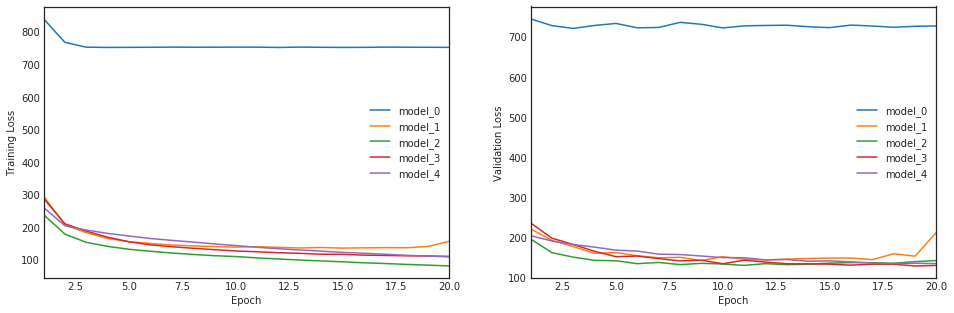

In [23]:
from glob import glob
import numpy as np
import _pickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style(style='white')

# obtain the paths for the saved model history
all_pickles = sorted(glob("results/*.pickle"))
# extract the name of each model
model_names = [item[8:-7] for item in all_pickles]
# extract the loss history for each model
valid_loss = [pickle.load( open( i, "rb" ) )['val_loss'] for i in all_pickles]
train_loss = [pickle.load( open( i, "rb" ) )['loss'] for i in all_pickles]
# save the number of epochs used to train each model
num_epochs = [len(valid_loss[i]) for i in range(len(valid_loss))]

fig = plt.figure(figsize=(16,5))

# plot the training loss vs. epoch for each model
ax1 = fig.add_subplot(121)
for i in range(len(all_pickles)):
    ax1.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
            train_loss[i], label=model_names[i])
# clean up the plot
ax1.legend()  
ax1.set_xlim([1, max(num_epochs)])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

# plot the validation loss vs. epoch for each model
ax2 = fig.add_subplot(122)
for i in range(len(all_pickles)):
    ax2.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
            valid_loss[i], label=model_names[i])
# clean up the plot
ax2.legend()  
ax2.set_xlim([1, max(num_epochs)])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()

In [36]:
# specify the model
model_end = final_model(input_dim = 161,
                       filters = 220,
                       kernel_size = 11,
                       conv_stride = 2,
                       conv_border_mode='valid',
                        units=200)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 161)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 220)         389840    
_________________________________________________________________
maxpool_normalized (BatchNor (None, None, 220)         880       
_________________________________________________________________
bidirectional_8 (Bidirection (None, None, 400)         505200    
_________________________________________________________________
bidir_rnn_normalized (BatchN (None, None, 400)         1600      
_________________________________________________________________
time_distributed_13 (TimeDis (None, None, 29)          11629     
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 29)          0         
__________



##  Obtain Predictions

function to decode the predictions of your acoustic model.

In [38]:
import numpy as np
from data_generator import AudioGenerator
from keras import backend as K
from utils import int_sequence_to_text
from IPython.display import Audio

def get_predictions(index, partition, input_to_softmax, model_path):
    """ Print a model's decoded predictions
    Params:
        index (int): The example you would like to visualize
        partition (str): One of 'train' or 'validation'
        input_to_softmax (Model): The acoustic model
        model_path (str): Path to saved acoustic model's weights
    """
    # load the train and test data
    data_gen = AudioGenerator()
    data_gen.load_train_data()
    data_gen.load_validation_data()
    
    # obtain the true transcription and the audio features 
    if partition == 'validation':
        transcr = data_gen.valid_texts[index]
        audio_path = data_gen.valid_audio_paths[index]
        data_point = data_gen.normalize(data_gen.featurize(audio_path))
    elif partition == 'train':
        transcr = data_gen.train_texts[index]
        audio_path = data_gen.train_audio_paths[index]
        data_point = data_gen.normalize(data_gen.featurize(audio_path))
    else:
        raise Exception('Invalid partition!  Must be "train" or "validation"')
        
    # obtain and decode the acoustic model's predictions
    input_to_softmax.load_weights(model_path)
    prediction = input_to_softmax.predict(np.expand_dims(data_point, axis=0))
    output_length = [input_to_softmax.output_length(data_point.shape[0])] 
    pred_ints = (K.eval(K.ctc_decode(
                prediction, output_length)[0][0])+1).flatten().tolist()
    
    # play the audio file, and display the true and predicted transcriptions
    print('-'*80)
    Audio(audio_path)
    print('True transcription:\n' + '\n' + transcr)
    print('-'*80)
    print('Predicted transcription:\n' + '\n' + ''.join(int_sequence_to_text(pred_ints)))
    print('-'*80)

In [ ]:
get_predictions(index=0, 
                partition='train',
                input_to_softmax=final_model(input_dim = 161,
                       filters = 220,
                       kernel_size = 11,
                       conv_stride = 2,
                       conv_border_mode='valid',
                        units=200), 
                model_path='results/model_end.h5')

In [ ]:
get_predictions(index=0, 
                partition='validation',
                input_to_softmax=final_model(input_dim = 161,
                       filters = 220,
                       kernel_size = 11,
                       conv_stride = 2,
                       conv_border_mode='valid',
                        units=200), 
                model_path='results/model_end.h5')